# <span style="color:navy"> Esercitazione 1 </span>

### Introduzione alla media a blocchi

Nelle simulazioni Monte Carlo, stimare l’incertezza statistica è fondamentale: un risultato non è completo senza una valutazione dell’errore associato, rappresentato dalla deviazione standard della media. Per ottenerlo, serve una buona stima della varianza della grandezza osservabile.

La varianza si definisce come:

$$
\sigma^2_A := \langle (A - \langle A \rangle)^2 \rangle = \langle A^2 \rangle - \langle A \rangle^2
$$

Tuttavia, a causa delle correlazioni tra campioni successivi, stimarla correttamente può essere difficile. Un metodo efficace per aggirare questo problema è la **media a blocchi**.

L’idea è semplice: si suddivide il totale dei dati generati in **N** blocchi (a partire da **M** passi Monte Carlo), ciascuno contenente \( L = M/N \) dati. In ogni blocco si calcola la media dell’osservabile, ottenendo $A_1, A_2, \dots, A_N $. Da queste si ottengono anche le medie dei quadrati $ A_1^2, A_2^2, \dots, A_N^2 $.

Si possono allora stimare:

$$
\langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A_i^2
\quad \quad
\langle A \rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2
$$

E, infine, l’**incertezza statistica** sulla media è data da:

$$
\frac{\sigma}{\sqrt{N - 1}} \simeq
\sqrt{
\frac{1}{N - 1} \left[
\frac{1}{N} \sum_{i=1}^N A_i^2 -
\left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2
\right]}
$$

Questo metodo consente di ridurre le correlazioni interne ai dati e fornisce una stima più realistica e stabile dell’incertezza.


## <span style="color:teal">  Esercizio 1.1</span>

In questo esercizio ho testato il generatore di numeri pseudo-casuali sfruttando la tecnica della media a blocchi.

Attraverso calcoli Monte Carlo ho stimato (per i numeri estratti uniformemente tra 0 e 1):
1. $\langle r \rangle = \int_0^1 r dr = 1/2$
2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$
3. $\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$

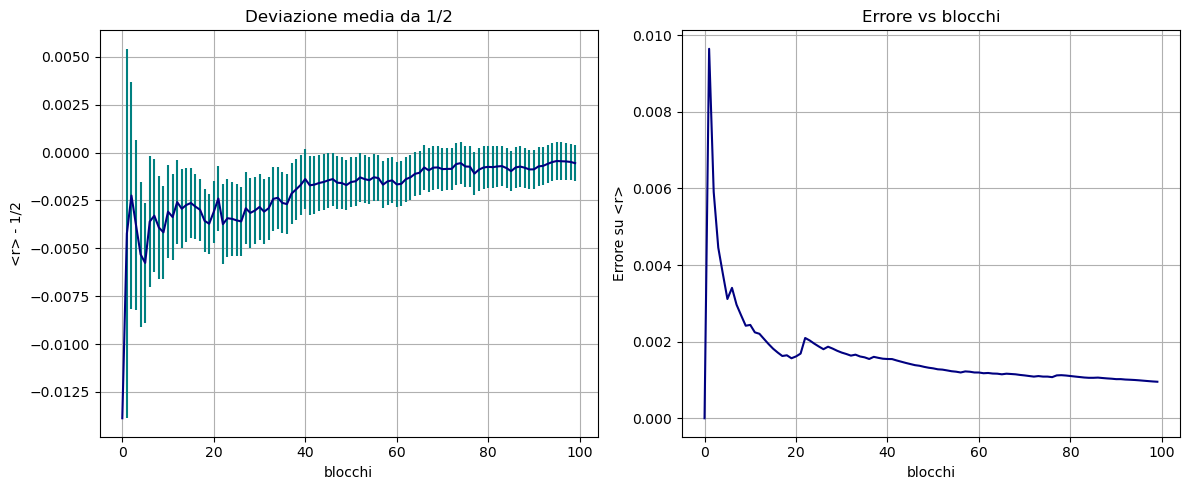

In [10]:
import matplotlib.pyplot as plt
import numpy as np

M = 100000
N = 100
x = np.arange(N)

data_medie = np.loadtxt("es1/medie.dat")
medie = data_medie[:,0]
errore_medie = data_medie[:,1]

# Crea un'unica figura con due subplot affiancati
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Primo subplot: <r> - 1/2
axs[0].errorbar(x, medie - 0.5, yerr=errore_medie,color='navy', ecolor='teal')
axs[0].set_xlabel('blocchi')
axs[0].set_ylabel('<r> - 1/2')
axs[0].set_title('Deviazione media da 1/2')
axs[0].grid(True)

# Secondo subplot: errore
axs[1].plot(x, errore_medie, marker='', linestyle='-', color='navy')
axs[1].set_xlabel('blocchi')
axs[1].set_ylabel('Errore su <r>')
axs[1].set_title('Errore vs blocchi')
axs[1].grid(True)

plt.tight_layout()
plt.show()


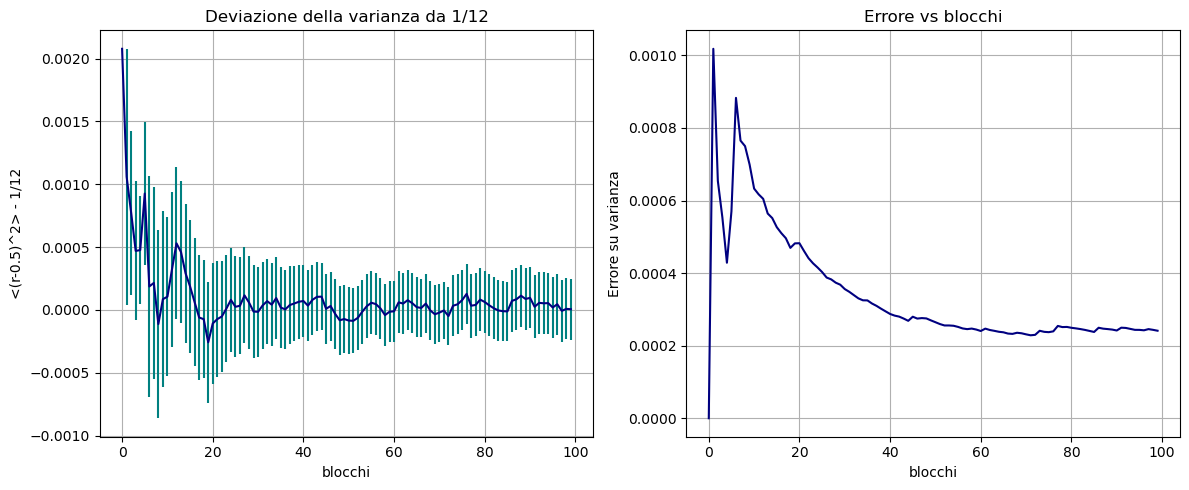

In [8]:
import matplotlib.pyplot as plt
import numpy as np

M = 100000
N = 100
x = np.arange(N)

data_varianze = np.loadtxt("es1/varianza.dat")
varianze = data_varianze[:,0]
errore_varianze = data_varianze[:,1]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Primo subplot: <(r-0.5)^2> - 1/12
axs[0].errorbar(x, varianze - 1/12, yerr=errore_varianze, color='navy', ecolor='teal')
axs[0].set_xlabel('blocchi')
axs[0].set_ylabel('<(r-0.5)^2> - 1/12')
axs[0].set_title('Deviazione della varianza da 1/12')
axs[0].grid(True)

# Secondo subplot: errore
axs[1].plot(x, errore_varianze, marker='', linestyle='-', color= 'navy')
axs[1].set_xlabel('blocchi')
axs[1].set_ylabel('Errore su varianza')
axs[1].set_title('Errore vs blocchi')
axs[1].grid(True)

plt.tight_layout()
plt.show()


Le simulazioni sono state effettuate utilizzando 100 blocchi da 1000 passi ciascuno, per un totale di $10^5$ numeri pseudo-casuali generati.
Dai grafici posssiamo osservare che sia il valor medio che la varianza convergono al valore aspettato. Inoltre l'errore scala come $\frac{1}{\sqrt N}$ come previsto dal teorema del limite centrale

Per concludere questo esercizio ho testato l’ipotesi che i numeri generati siano distribuiti uniformemente nell’intervallo $[0, 1]$. In statistica, non possiamo dimostrare con certezza che una sequenza di eventi casuali provenga da una specifica distribuzione (e nel nostro caso, l’ipotesi è tecnicamente falsa, poiché i numeri pseudo-casuali sono generati da algoritmi deterministici). Tuttavia, possiamo stimare la probabilità che i dati osservati provengano da una distribuzione uniforme: se tale probabilità è troppo bassa, possiamo rifiutare l’ipotesi di uniformità.

Per fare questo ho utilizzato il **test $\chi^2$ di Pearson**, che misura la discrepanza tra valori osservati $O_i$ e valori attesi $E_i$:

$$
\chi^2 = \sum_{i} \frac{(O_i - E_i)^2}{E_i}
$$

Nel nostro caso, ho suddiviso l’intervallo $[0,1]$ in $M=100$ sottointervalli identici e contato quanti numeri cadono in ciascuno. L’esperimento è stato ripetuto per $n = 10^4$ numeri, presi 100 volte consecutive..

Poiché la distribuzione attesa è uniforme, ci aspettiamo $E_i = n/M$, e la formula si semplifica in:

$$
\chi^2 = \sum_{i=1}^{M} \frac{(n_i - n/M)^2}{n/M}
$$

In media ci si aspetta $\chi^2 \approx M = 100$. Un valore molto più alto indica che i dati osservati si discostano sensibilmente da una distribuzione uniforme, suggerendo che l’ipotesi di uniformità sia improbabile.


Media di Chi2: 100.012
Deviazione standard di Chi2: 14.048600499693912


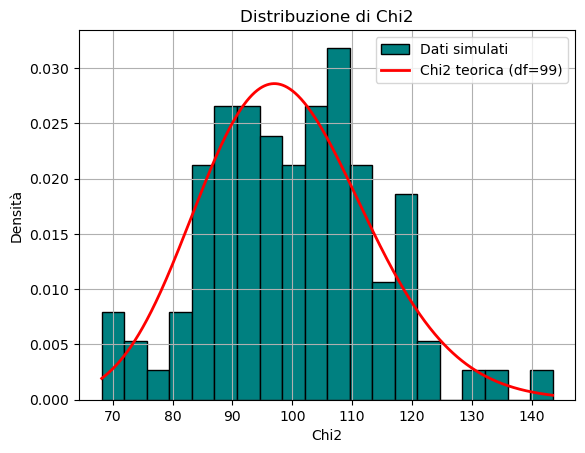

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

data_chi2 = np.loadtxt("es1/Chi2.dat")

mean_chi2 = np.mean(data_chi2)
std_chi2 = np.std(data_chi2)
print(f"Media di Chi2: {mean_chi2}")
print(f"Deviazione standard di Chi2: {std_chi2}")

# Parametri del test: m = 100 intervalli, quindi gradi di libertà = m-1 = 99
df = 99

# Istogramma dei dati
plt.hist(data_chi2, bins=20, color='teal', edgecolor='black', density=True, label='Dati simulati')

# Fit della funzione chi quadro teorica
x = np.linspace(min(data_chi2), max(data_chi2), 1000)
plt.plot(x, chi2.pdf(x, df), 'r-', lw=2, label=f'Chi2 teorica (df={df})')

plt.title('Distribuzione di Chi2')
plt.xlabel('Chi2')
plt.ylabel('Densità')
plt.grid(True)
plt.legend()
plt.show()

Possiamo osservare che la media dei valori ottenuti dal test del $\chi^2$ è circa 100 come previsto teoricamente, inoltre è mostrato nel grafico il confronto tra l'istogramma ottenuto con i dati simulati e la distribuzione reale del $\chi^2$ con 99 gradi di libertà

## <span style="color:teal">  Esercizio 1.2</span>

In questo esercizio ho esteso il generatore di numeri casuali aggiungendo due metodi che sfruttano l'inversione della funzione cumulativa per campionare secondo la distribuzione esponenziale e la distribuzione di Cauchy-Lorentz. In questo modo abbiamo potuto mettere ancora una volta alla prova il generatore verificando che rispettasse il teorema del limite centrale.

### Teorema del limite centrale
Se le variabili $x_i$ sono indipendenti e identicamente distribuite, con media finita $\mu$ e varianza finita $\sigma^2$, allora, per $N$ sufficientemente grande, la distribuzione della media $S_N$ tende a una distribuzione gaussiana con media $\mu$ e deviazione standard $\frac{\sigma}{\sqrt{N}}$.

Ho calcolato $10^4$ volte $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ campionando $x_i$ secondo le tre diverse distribuzioni e ho riportato qui sotto gli istogrammi ottenuti con $N=1, 2, 10, 100$

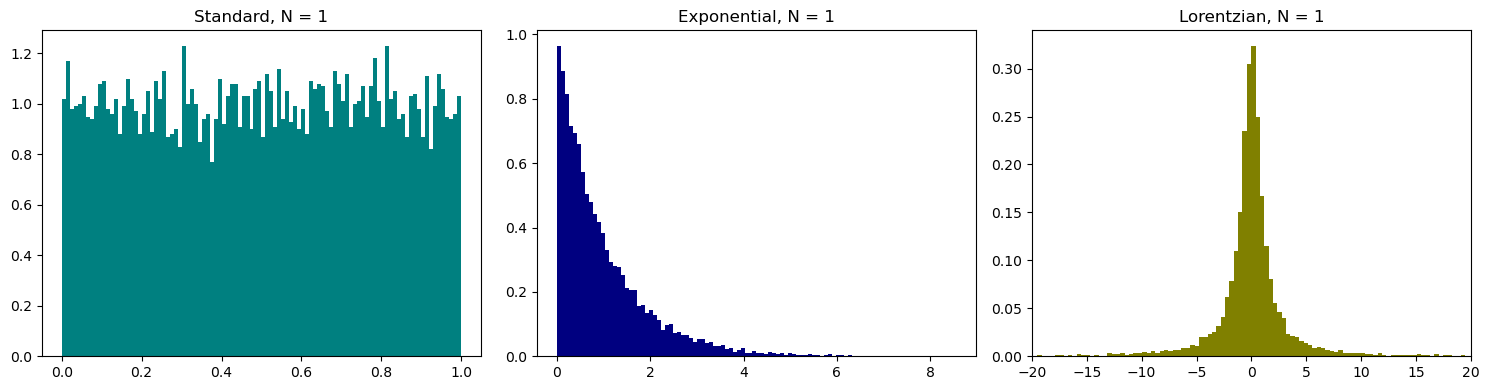

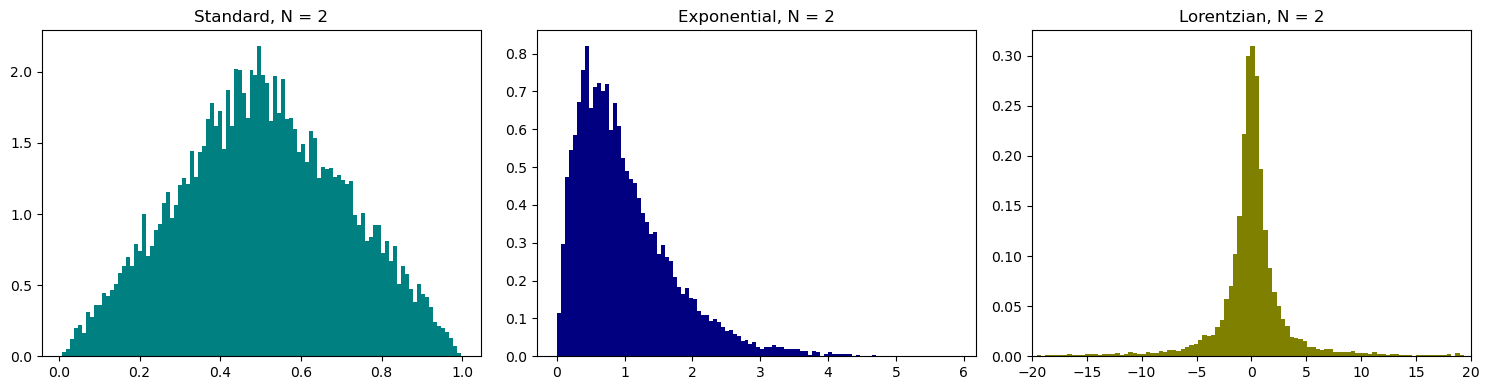

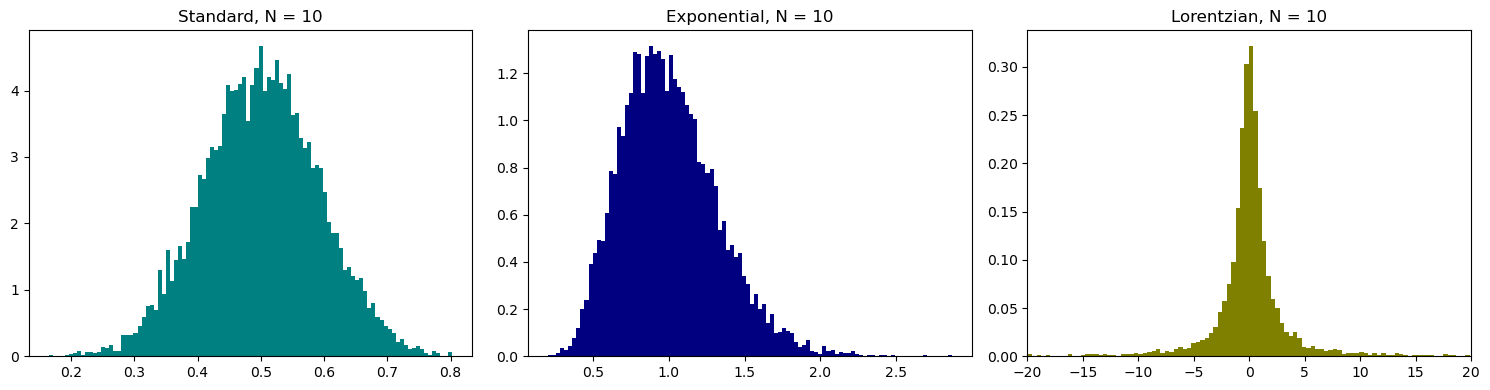

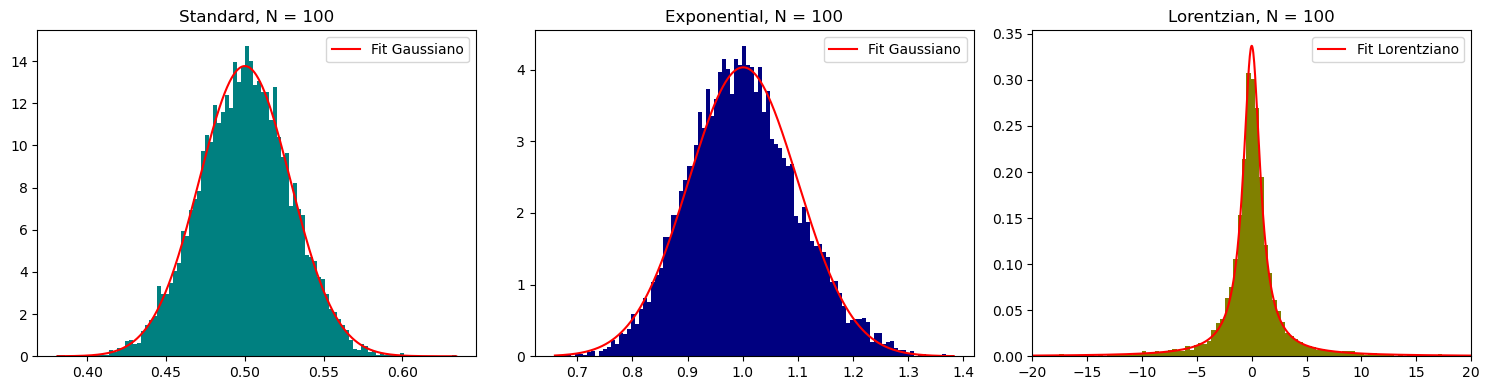

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, cauchy

N = [1, 2, 10, 100]
colors = ['teal', 'navy', 'olive']

for i, n in enumerate(N):
    # Carica i dati dal file corrispondente
    stand, exp, lor = np.loadtxt(f"es2/histo_N{n}.dat", unpack=True)
    # Filtra la Lorentziana per evitare code troppo estreme
    lor_f = [x for x in lor if abs(x) <= 20]
    fig, (h1, h2, h3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    h1.hist(stand, bins=100, density=True, color=colors[0])
    h1.set_title(f"Standard, N = {n}")

    h2.hist(exp, bins=100, density=True, color=colors[1])
    h2.set_title(f"Exponential, N = {n}")

    h3.hist(lor_f, bins=100, density=True, color=colors[2])
    h3.set_title(f"Lorentzian, N = {n}")
    h3.set_xlim(-20, 20)

    # Fit solo per N=100
    if n == 100:
        mu_s, sigma_s = norm.fit(stand)
        mu_e, sigma_e = norm.fit(exp)
        var_fit, gamma_fit = cauchy.fit(lor_f)

        x_fit = np.linspace(min(stand), max(stand), 1000)
        z_fit = np.linspace(min(exp), max(exp), 1000)
        w_fit = np.linspace(-20, 20, 1000)

        h1.plot(x_fit, norm.pdf(x_fit, mu_s, sigma_s), 'r-', label=fr"Fit Gaussiano")
        h1.legend()

        h2.plot(z_fit, norm.pdf(z_fit, mu_e, sigma_e), 'r-', label=fr"Fit Gaussiano")
        h2.legend()

        h3.plot(w_fit, cauchy.pdf(w_fit, loc=var_fit, scale=gamma_fit), 'r-', label=fr"Fit Lorentziano")
        h3.legend()

    plt.tight_layout()
    plt.show()

Come previsto, per la distribuzione uniforme e per quella esponenziale vale il teorema del limite centrale e per **N** abbastanza grande (100) la distribuzione della media tende a una gaussiana.

Non vale lo stesso per la distribuzione Lorentziana. Infatti la distribuzione della media di una Lorentziana è ancora una Lorentziana, questo perchè non ha varianza finita e quindi non rispetta le ipotesi del TLC

## <span style="color:teal">  Esercizio 1.3</span>

In questo esercizio ho simulato l’esperimento di Buffon: un ago di lunghezza $L$ viene lanciato casualmente su un piano orizzontale segnato da linee parallele equidistanti, a distanza $d$ l’una dall’altra (con $d > L$, ma non troppo grande altrimenti la probabilità di intersezione diventa troppo piccola). Ho scelto $L = 0.7 $ e $d = 1$.

La probabilità $P$ che l’ago intersechi una delle linee è data da:

$$
P = \frac{2L}{\pi d}
$$

Questa relazione può essere invertita per stimare $\pi$ a partire dai lanci. Se l’ago viene lanciato $N_{\text{thr}}$ volte e interseca una linea $N_{\text{hit}}$ volte, si può stimare $\pi$ con la formula:

$$
\pi = \frac{2L N_{\text{thr}}}{N_{\text{hit}} d}
$$

Ho quindi effettuato un gran numero ($10^5$) di lanci $M$ e applicato il metodo della media a blocchi per stimare $\pi$ e la sua incertezza statistica, al variare del numero di blocchi $N$. Ho rappresentato graficamente l’andamento della stima di $\pi$ e della sua incertezza in funzione di $N$.


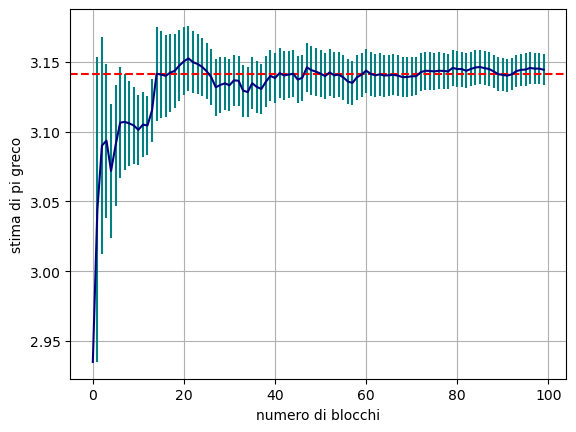

In [41]:
import matplotlib.pyplot as plt
import numpy as np

data_pi = np.loadtxt("es3/buffon.dat")

x=data_pi[:,0]
pi = data_pi[:,1]
errore_pi = data_pi[:,2]

plt.errorbar(x,pi,yerr=errore_pi,color='navy', ecolor='teal')
plt.xlabel('numero di blocchi')
plt.ylabel('stima di pi greco')
plt.axhline (y=np.pi, color='red', linestyle='--', label='Valore atteso')
plt.grid(True)
plt.show()

Come si può osservare nel grafico sopra, il valore simulato converge al valore aspettato. Dopo quest'ulteriore verifica, possiamo affermare che questo generatore di numeri casuali fa bene il suo lavoro!